<a href="https://colab.research.google.com/github/defne04/DSA210-PROJECT/blob/main/data_process1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65065 entries, 0 to 65064
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  65065 non-null  object 
 1   Date        65065 non-null  object 
 2   Series      65065 non-null  object 
 3   Court       65065 non-null  object 
 4   Surface     65065 non-null  object 
 5   Round       65065 non-null  object 
 6   Best of     65065 non-null  int64  
 7   Player_1    65065 non-null  object 
 8   Player_2    65065 non-null  object 
 9   Winner      65065 non-null  object 
 10  Rank_1      65065 non-null  int64  
 11  Rank_2      65065 non-null  int64  
 12  Pts_1       65065 non-null  int64  
 13  Pts_2       65065 non-null  int64  
 14  Odd_1       65065 non-null  float64
 15  Odd_2       65065 non-null  float64
 16  Score       65065 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.4+ MB
None
                           Tournament       

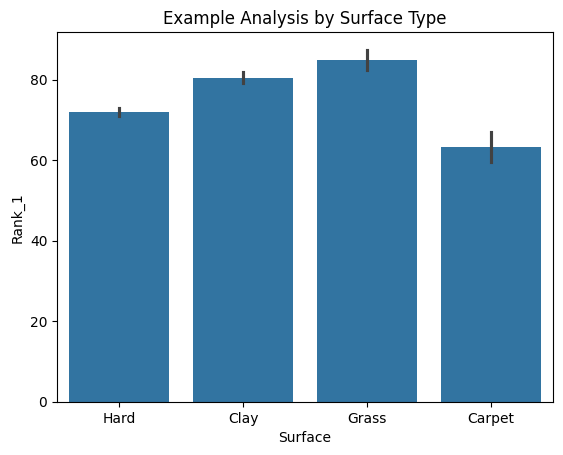

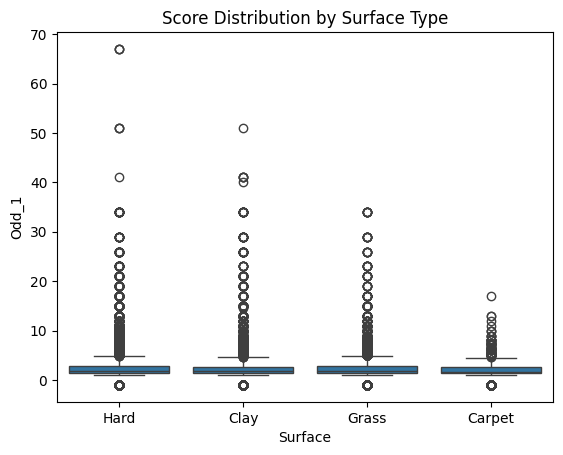

F-statistic: 75.48668578272995, p-value: 1.8009514018645868e-33
0    140
1     61
2    695
3    152
4    279
Name: Match Intensity Index, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Serving Consistency, dtype: int64
  Surface                  Tournament  Match Count
0  Carpet                 BNP Paribas          404
1  Carpet                   Breil ATP           30
2  Carpet      Davidoff Swiss Indoors          121
3  Carpet          Grand Prix de Lyon          271
4  Carpet  Indesit ATP Milano Indoor            31


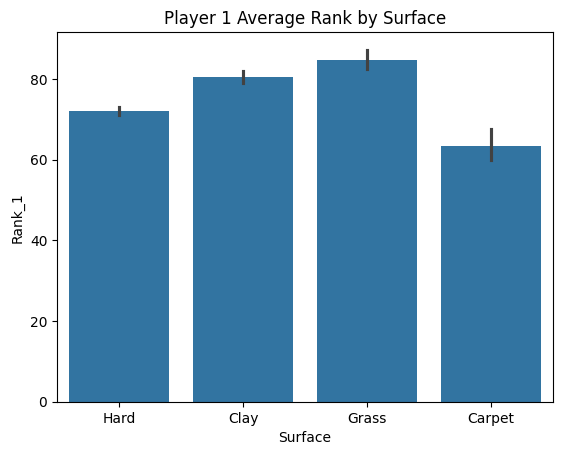

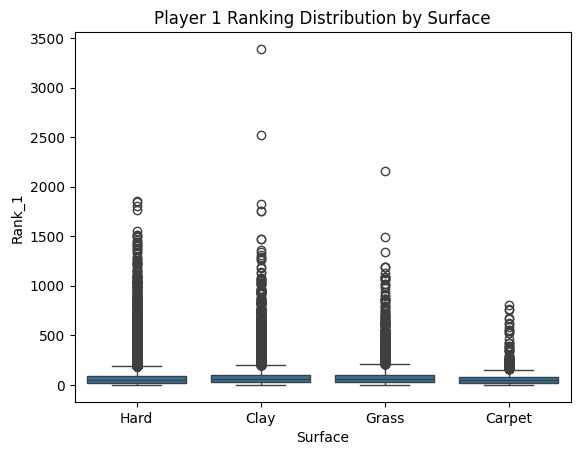

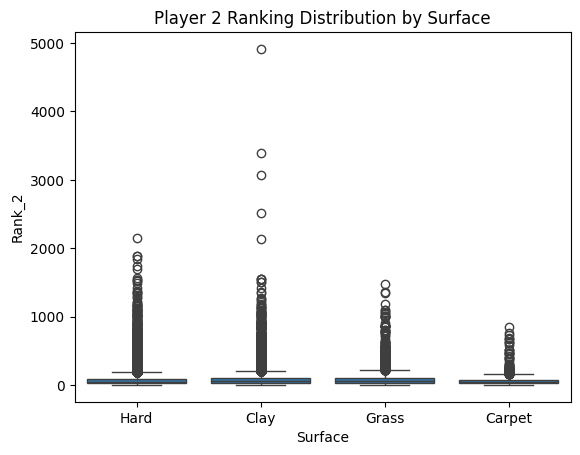

<ipython-input-13-4f21faa1fdc3>:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Surface', y='Odd_1', data=data, ci=None)


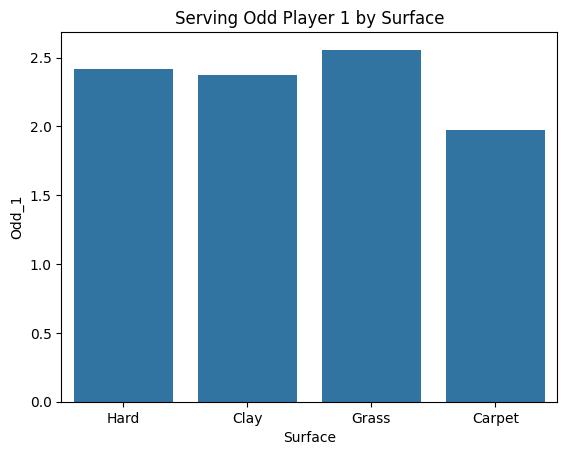

<ipython-input-13-4f21faa1fdc3>:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Surface', y='Odd_2', data=data, ci=None)


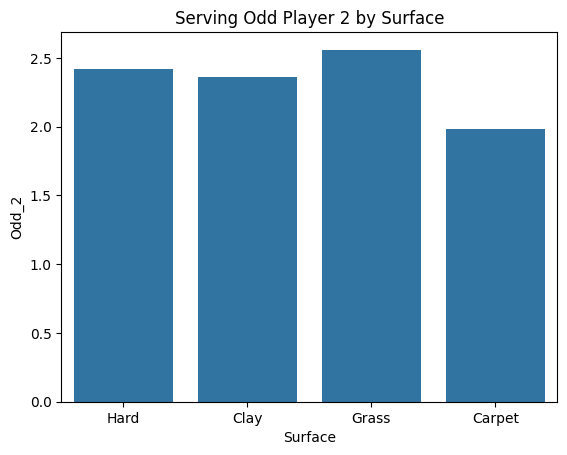

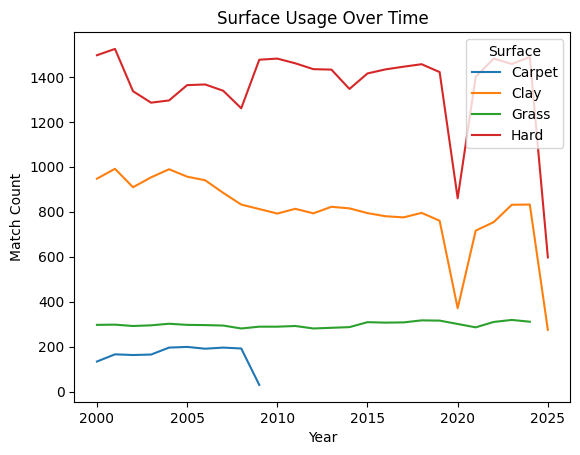

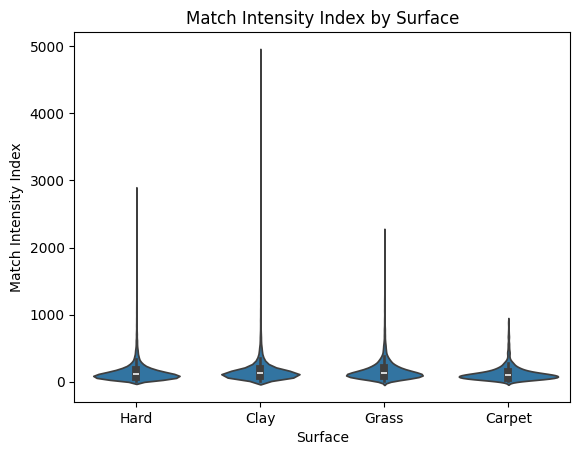

<ipython-input-13-4f21faa1fdc3>:86: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Surface', y='Win Margin', data=data, ci=None)


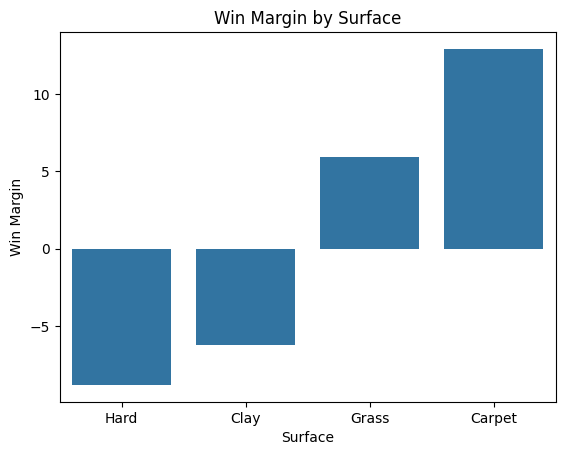

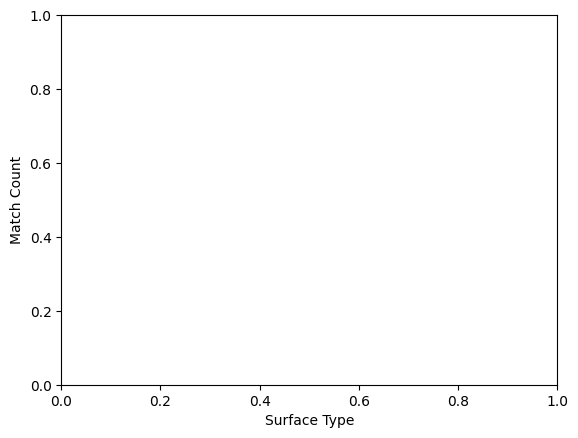

In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv('/content/atp_tennis.csv')

# Display dataset information and preview
print(data.info())
print(data.head())

# Drop rows with missing values (if any)
data = data.dropna()

# Verify there are no missing values
print(data.isnull().sum())

if 'Surface' in data.columns and 'Rank_1' in data.columns:  # Example check for available columns
    sns.barplot(x='Surface', y='Rank_1', data=data)  # Replace y-axis if column differs
    plt.title('Example Analysis by Surface Type')
    plt.show()
# Boxplot for score distribution by surface
sns.boxplot(x='Surface', y='Odd_1', data=data)  # Replace with relevant column
plt.title('Score Distribution by Surface Type')
plt.show()


if 'Surface' in data.columns and 'Rank_1' in data.columns:
    clay = data[data['Surface'] == 'Clay']['Rank_1']
    grass = data[data['Surface'] == 'Grass']['Rank_1']
    hard = data[data['Surface'] == 'Hard']['Rank_1']

    # Perform ANOVA test
    f_stat, p_value = f_oneway(clay, grass, hard)
    print(f"F-statistic: {f_stat}, p-value: {p_value}")

if 'Rank_1' in data.columns and 'Rank_2' in data.columns:
    data['Match Intensity Index'] = data['Rank_1'] + data['Rank_2']
    print(data['Match Intensity Index'].head())
if 'Pts_1' in data.columns and 'Pts_2' in data.columns:
    data['Serving Consistency'] = data['Pts_1'] - data['Pts_2']
    print(data['Serving Consistency'].head())
if 'Surface' in data.columns and 'Tournament' in data.columns:
    surface_trends = data.groupby(['Surface', 'Tournament']).size().reset_index(name='Match Count')
    print(surface_trends.head())
sns.barplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Average Rank by Surface')
plt.show()

# Boxplot for Player 1 rankings by surface
sns.boxplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Ranking Distribution by Surface')
plt.show()

# Boxplot for Player 2 rankings by surface
sns.boxplot(x='Surface', y='Rank_2', data=data)
plt.title('Player 2 Ranking Distribution by Surface')
plt.show()

# Bar chart for serving inconsistencies by surface
sns.barplot(x='Surface', y='Odd_1', data=data, ci=None)
plt.title('Serving Odd Player 1 by Surface')
plt.show()

sns.barplot(x='Surface', y='Odd_2', data=data, ci=None)
plt.title('Serving Odd Player 2 by Surface')
plt.show()

# Line plot for surface usage over time
data['Year'] = pd.to_datetime(data['Date']).dt.year  # Extract year from date
surface_trend = data.groupby(['Year', 'Surface']).size().reset_index(name='Match Count')

sns.lineplot(x='Year', y='Match Count', hue='Surface', data=surface_trend)
plt.title('Surface Usage Over Time')
plt.show()

# Violin plot for Match Intensity Index by surface
sns.violinplot(x='Surface', y='Match Intensity Index', data=data)
plt.title('Match Intensity Index by Surface')
plt.show()

data['Win Margin'] = data['Pts_1'] - data['Pts_2']  # Calculate win margin

sns.barplot(x='Surface', y='Win Margin', data=data, ci=None)
plt.title('Win Margin by Surface')
plt.show()

plt.xlabel('Surface Type')
plt.ylabel('Match Count')
plt.savefig('plot_name.png')
